Ricardo Duarte, [Python for Developers](http://ricardoduarte.github.io/python-for-developers/#content "Python for Developers on GitHub")
==========================

**Adapted by [Arthur Goldberg](https://www.mountsinai.org/profiles/arthur-p-goldberg) for the [Biomedical Software Engineering](https://learn.mssm.edu/webapps/blackboard/content/listContentEditable.jsp?content_id=_448512_1&course_id=_5776_1 "Biomedical Software Engineering Blackboard site") course at the Mount Sinai School of Medicine**

Chapter 6: Functions
=============================
_____________________________

A function is a block of code identified by a name. The keyword `def` defines a function.

In [1]:
# define a minimal function
# the statement 'pass' does nothing
def f():
    pass
# function definitions are python objects
print(f, "; f's name:", f.__name__)
# calling f does nothing
f()

<function f at 0x7fe4384d6950> ; f's name: f


A function definition can declare parameters, which are names of objects that can be passed in by calls to the function. Functions that take parameters can be very useful, becaue they can be widely reused.

In [2]:
# a `docstring` summarizes this function
def longest(sequences):
    """ return the longest element of `sequences` """
    longest_element = None
    max_length = 0
    for element in sequences:
        if max_length < len(element):
            max_length = len(element)
            longest_element = element
    return (longest_element, max_length) # return a tuple

print('longest([]):', longest([]))
print("longest(['', '333', '1', '55555']):", longest(['', '333', '1', '55555']))

longest([]): (None, 0)
longest(['', '333', '1', '55555']): ('55555', 5)


In [3]:
# a function that doesn't use return always returns `None`
print('f():', f())

f(): None


`longest` defines two variables, `longest_element` and `max_length`. These are *local* variables, which are available only inside the function, after they're declared:

In [4]:
print('longest_element', longest_element)

NameError: name 'longest_element' is not defined

Local variables are helpful, because they reduce or eliminate the possibility that a new variable name will overwrite and change the name of an existing variable. But local variables will obscure existing global definitions.
Many Python components, including functions, modules, classes, methods in classes, and others, support local variables.

In [ ]:
x = 3
def g():
    x = 'mom'
    print('x in g():', x)
g()
print('global x:', x)

tmp = type
def type(x):
    print('typing', x)
type(3)

In [ ]:
type = tmp
print(type(3))

A function call contains *arguments* that correspond to the parameters in the function's definition.

In [ ]:
def type_check(my_str, my_int, my_float):
    # isinstance(object, classinfo), return true if `object` is an instance of `classinfo` argument, or ...
    if not isinstance(my_str, str):
        print("my_str '{}' is not a string".format(my_str))
    if not isinstance(my_int, int):
        print("my_int '{}' is not an integer".format(my_int))
    if not isinstance(my_float, float):
        print("my_float '{}' is not a float".format(my_float))
print("type_check('a', 3, 2.3):")
type_check('a', 3, 2.3)
print("type_check(3, 'a', 2.5):")
type_check(3, 'a', 2.5)

Function calls must use the right number of arguments.

A function can modify arguments that are mutable, but cannot modify immutable arguments.

In [ ]:
def test_mod_args(my_str, my_int, my_list, my_set):
    my_str = my_str + '...'
    my_int = my_int + 1
    my_list.append('in test_mod_args')
    my_set.add('in test_mod_args')

my_str, my_int, my_list, my_set = 'hi mom', 37, [1, 'x'], {'a', 'a', 'z'}
test_mod_args(my_str, my_int, my_list, my_set)
print('my_str:', my_str)
print('my_int:', my_int)
print('my_list:', my_list)
print('my_set:', my_set)
# note that immutable objects do not have any methods that modify them

*Keyword* parameters are named parameters with default values. All *positional* parameters must come before any keyword parameters. Keyword parameters are *optional*, which makes them very handy for optional features in functions.

For example, the built-in [sort()](https://python.readthedocs.io/en/latest/library/stdtypes.html#lists) method on lists has the signature `sort(self, key=None, reverse=False)`. `key` specifies a function of one argument that create a comparison key for each list element. If `reverse` is `True`, then the list elements are sorted in reverse order.

In [ ]:
# sort() modifies a list in-place
l = ['Bill', 'can', 'already', 'drive', 'Crazily', 'fast']
m = l.copy()
m.sort()
print('l.sort():', m)
m = l.copy()
m.sort(reverse=True)
print('l.sort(reverse=True):', m)
m = l.copy()
m.sort(key=str.lower)
print('l.sort(key=str.lower):', m)

Keyword arguments can be provided in any order. A popular library that uses many [keyword arguments](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) (which is often abbreviated *kwargs*) is [matplotlib](https://matplotlib.org/), which makes publication quality 2D scientific plots.

<IPython.core.display.Javascript object>


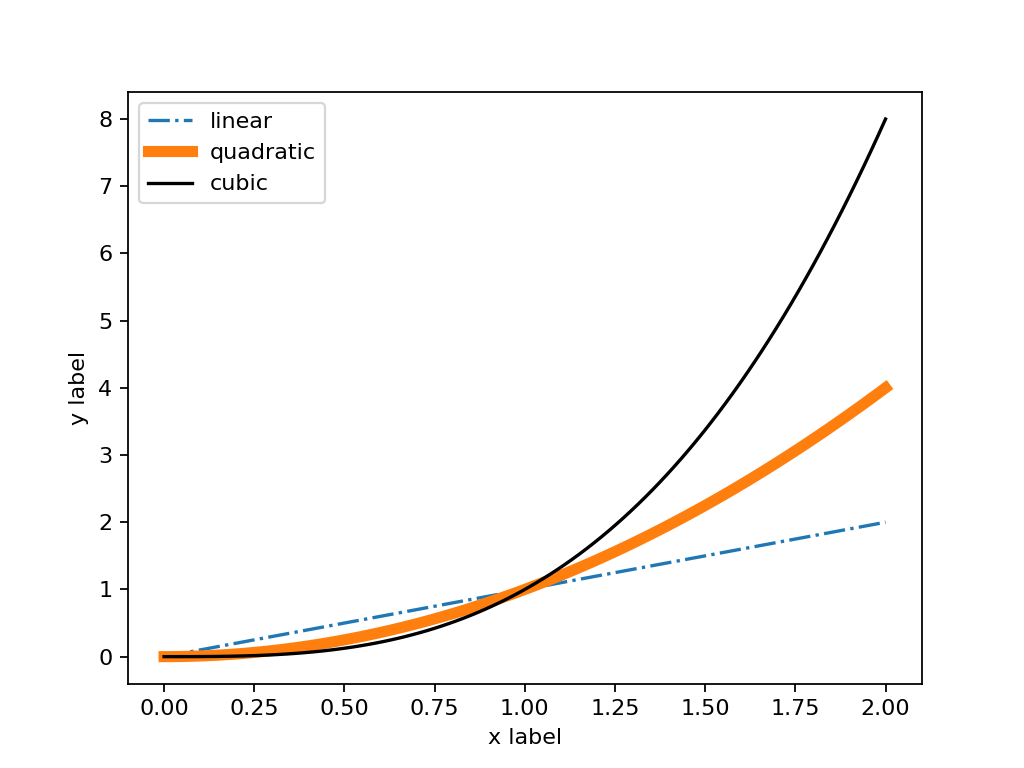

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear', linestyle='-.')
plt.plot(x, x**2, label='quadratic', linewidth=5)
plt.plot(x, x**3, label='cubic', color='black')

plt.xlabel('x label')
plt.ylabel('y label')

plt.legend()
plt.show()

**Caution:** do not provide mutable objects as default values for keyword arguments. They are instantiated when the function is compiled, and can be *permanently* modified by the function. This can lead to bugs that are difficult to find if modification and use of the mutable object are scattered in functions or methods called by the function.

In [6]:
def f(x, list_kw=[1, 4, 7]):
    print('list_kw:', list_kw)
    list_kw.append('woops')

f(3)
f(3)
f(3)

list_kw: [1, 4, 7]
list_kw: [1, 4, 7, 'woops']
list_kw: [1, 4, 7, 'woops', 'woops']


Instead, use immutable objects as default values, and, if the default should be mutable, provide a copy of the desired default value at the start of the function.

In [7]:
DEFAULT_LIST = [1, 4, 7]    # use ALL_CAPS for constants
def f(x, list_kw=None):
    if not list_kw:
        list_kw = DEFAULT_LIST.copy()
    print('list_kw:', list_kw)
    list_kw.append('woops')

f(3)
f(3)

list_kw: [1, 4, 7]
list_kw: [1, 4, 7]


*Doc Strings* are strings that are attached to a Python structure. In functions, the *Doc strings* are placed within the body of the function, immediately after the `def` line. The goal of *Doc Strings* is to be used as documentation for this structure.

Syntax:

    def func(parameter1, parameter2=default_value):
        """
        Doc String
        """
        <code block>
        return value

The parameters with *default* value must be declared after the ones without *default* value.

Example (factorial with recursion):

Other, advanced function topics include:
+ passing positional arguments in lists or tuples, and kwargs in dictionaries
+ nested functions
+ recursion
+ decorators
+ `eval()`


In [8]:
# Factorial implemented with recursion

def factorial(num):

    if num <= 1:
        return 1
    else:
        return(num * factorial(num - 1))

# Testing factorial()
print(factorial(5))

120


Example (factorial without recursion):

In [9]:
def fatorial(n):

    n = n if n > 1 else 1
    j = 1
    for i in range(1, n + 1):
        j = j * i
    return j

# Testing...
for i in range(1, 6):
    print(i, '->', fatorial(i))

1 -> 1
2 -> 2
3 -> 6
4 -> 24
5 -> 120


Example of how to get all parameters:

In [10]:
# *args - arguments without name (list)
# **kargs - arguments with name (ditcionary)

def func(*args, **kargs):
    print(args)
    print(kargs)

func('weigh', 10, unit='k')

('weigh', 10)
{'unit': 'k'}
